# Measuring Expectation Values in Quantum Circuits

In quantum computing, measurements are typically performed in the **computational basis** (i.e., the $Z$ basis). When we measure a quantum state, the outcome is a **bitstring** that represents the state of each qubit. For example, for a single qubit, the two possible outcomes are:
- `"0"` corresponding to the state $|0\rangle$
- `"1"` corresponding to the state $|1\rangle$

## Expectation Value Calculation

The **expectation value** of an observable is computed as the weighted sum of its eigenvalues, where the weights are the probabilities of obtaining each measurement outcome. Consider the single-qubit $Z$ operator, whose matrix representation is:

$$
Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} = |0\rangle\langle 0| - |1\rangle\langle 1|
$$

For a state $|\psi\rangle$, the expectation value is given by

$$
\langle \psi| Z |\psi\rangle =  \langle \psi|0\rangle \langle 0| \psi\rangle - \langle \psi|1\rangle \langle 1| \psi\rangle =
\text{Prob}(0) \times 1 + \text{Prob}(1) \times (-1) = \text{Prob}(0) - \text{Prob}(1)
$$

where $\text{Prob}(0) = \langle \psi| 0 \rangle^2$ and $\text{Prob}(1) = \langle \psi| 1 \rangle^2$.

## Bitstring Measurements

After executing a quantum circuit, measurement outcomes are returned as bitstrings. For instance, in a 2-qubit system you might observe bitstrings like `"00"`, `"01"`, `"10"`, and `"11"`. Each bit corresponds to the measurement of one qubit. The probability of each bitstring is determined by the number of times it appears (the counts) divided by the total number of measurements.

These probabilities are used to calculate the expectation value by taking the dot product with a vector of eigenvalues corresponding to the observable. For example, for a single qubit:

$$
\langle \psi| Z |\psi\rangle = P(0) - P(1)
$$

where $P(0)$ and $P(1)$ are the probabilities of measuring `"0"` and `"1"`, respectively.


In [1]:
import numpy as np
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
S = np.array([[1, 0], [0, np.cos(np.pi/2) + 1j * np.sin(np.pi/2)]])

In [2]:
import sys
import os
# Add the project root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [3]:
from utils import display_matrix
display_matrix(Z)
display_matrix(H)
display_matrix(S)
display_matrix(I)
display_matrix(X)
display_matrix(Y)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Task 1: Measuring in the Computational Basis

In this task, you will complete the code to measure the expectation value of the observable \(Z\) for a given quantum state. Follow these steps:

1. **Prepare the quantum state:** Build a simple circuit (for example, using a Hadamard gate to create a superposition).
2. **Measure in the computational basis:** Add measurement operations to the circuit.
3. **Convert the counts to probabilities:** Calculate the probability of each outcome.
4. **Compute the expectation value:** Use the eigenvalue vector for $Z$ (i.e., $[1, -1]$ for a single qubit) and compute the dot product with the probability vector.

*Hint:* For a single qubit, if you have probabilities $P(0)$ and $P(1)$, then:
$$
\langle Z \rangle = P(0) - P(1)
$$

In [4]:

# Task 1: Measuring in the Computational Basis

from qiskit import QuantumCircuit
import numpy as np
from qiskit_aer.primitives import  SamplerV2

# 1. Prepare a quantum circuit for a single qubit state.
qc = QuantumCircuit(1)


# (Optional) Prepare a non-trivial state; here, we use a Hadamard gate.
# qc.h(0)

##################################################################################################
# PREPARE DIFFERENT STATES AND MEASURE IN THE COMPUTATIONAL BASIS



################################################################################################

# 2. Add measurement in the computational (Z) basis.
qc.measure_all()

# 3. Execute the circuit on a simulator.

sampler = SamplerV2(default_shots=100000)
sampler_job = sampler.run([(qc)])
counts = sampler_job.result()[0].data.meas.get_counts()
shots = sampler_job.result()[0].data.meas.num_shots


print("Measurement counts:", counts)

# 4. Convert counts to probabilities.
shots = sum(counts.values())
probabilities = {state: count/shots for state, count in counts.items()}
print("Probabilities:", probabilities)

# 5. Compute the expectation value of Z.
# For a single qubit, we map '0' to eigenvalue +1 and '1' to eigenvalue -1.


# Complete the code below to compute <Z> = P(0) - P(1)

exp_val_z = probabilities.get('0', 0) - probabilities.get('1', 0)

print("Expectation value of Z:", np.round(exp_val_z,3))


Measurement counts: {'0': 50096, '1': 49904}
Probabilities: {'0': 0.50096, '1': 0.49904}
Expectation value of Z: 0.002



## Basis Rotations for Non-Diagonal Observables

Observables such as $X$ and $Y$ are not diagonal in the computational basis. To measure these, we apply a basis rotation to the **state** (not the observable) so that the eigenstates of the observable align with the computational basis. For example:

- **Measuring $X$:**

  To measure $X$, we rotate the state by applying the Hadamard gate $H$. Then, the expectation value is computed as

  $$
  \langle \psi| X |\psi\rangle = \langle \psi| H Z H |\psi\rangle = \langle \phi| Z |\phi\rangle
  $$
  So Measuring $ \langle X \rangle$ in the state $|\psi\rangle$ is equivalent to measuring $\langle Z \rangle$ in the state $| \phi \rangle = H|\psi\rangle$.
- **Measuring $Y$:**

  To measure $Y$, we rotate the state by applying $S^{\dagger}$ followed by $H$. Then, the expectation value is computed as

  $$
  \langle \psi| Y |\psi\rangle = \langle \psi| S H Z H S^\dagger |\psi\rangle = \langle \Phi| Z |\Phi\rangle
  $$
  So Measuring $ \langle Y \rangle$ in the state $|\psi\rangle$ is equivalent to measuring $\langle Z \rangle$ in the state $| \Phi \rangle = H S^\dagger |\psi\rangle$.

After these rotations, a measurement in the computational basis (the $Z$ basis) yields the expectation value of the desired observable.



## Task 2: Measuring with Basis Rotations

In this task, you will measure the expectation value of a non-diagonal Pauli operator (like \(X\) or \(Y\)). Since these operators are not diagonal in the computational basis, you must apply an appropriate rotation before measurement.

The steps are:

1. **Prepare the quantum state:** Build a circuit that prepares the state.
2. **Apply the rotation to the measurement basis:**  
   - For $X$: Apply a Hadamard gate, since $X = H Z H$.  
   - For $Y$: Apply $S^\dagger$ followed by a Hadamard gate, since $Y = S H Z H S^\dagger$.
3. **Measure in the computational basis.**
4. **Convert the counts to probabilities.**
5. **Compute the expectation value:** Again, use the eigenvalue vector for $Z$.

*Hint:* Write a helper function `rotate_for_measurement(qc, pauli)` that applies the appropriate rotation to the circuit `qc` for a given Pauli operator.



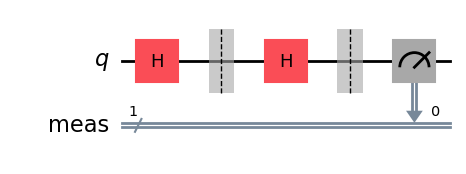

Measurement counts (after rotation): {'0': 100000}
Probabilities (after rotation): {'0': 1.0}
Expectation value of X: 1.0


In [5]:
# Task 2: Measuring with Basis Rotations
from qiskit import QuantumCircuit
import numpy as np
from qiskit_aer.primitives import  SamplerV2

def rotate_for_measurement(qc, pauli):
    """
    Apply the necessary rotations so that measuring in the Z basis
    yields the expectation value for the desired Pauli operator.
    
    Args:
        qc (QuantumCircuit): The quantum circuit to modify.
        pauli (str): The Pauli operator to measure ('X', 'Y', or 'Z').
    
    Returns:
        QuantumCircuit: The modified circuit with rotation gates applied.
    """
    if pauli == 'X':
        # For X, apply a Hadamard gate: X = H Z H.
        qc.h(0)
    elif pauli == 'Y':
        # For Y, apply S† then H : Y = S H Z H S† .
        qc.sdg(0)
        qc.h(0)

        
    # For Z, no rotation is necessary.
    return qc

# 1. Prepare a quantum circuit for a single qubit state.
qc_rot = QuantumCircuit(1)
# (Optional) Prepare a non-trivial state; here, we use a Hadamard gate.
qc_rot.h(0)

qc_rot.barrier()
# 2. Specify which Pauli operator you want to measure (choose 'X' or 'Y').
####################################################################

pauli_operator = 'X'  # Change to 'Y' if desired



####################################################################
# 3. Apply the rotation for the desired measurement.
qc_rot = rotate_for_measurement(qc_rot, pauli_operator)

# 4. Add measurement in the computational (Z) basis.
qc_rot.measure_all()
display(qc_rot.draw('mpl'))
# 5. Execute the circuit on a simulator.

sampler = SamplerV2(default_shots=100000)
sampler_job = sampler.run([(qc_rot)])
counts_rot = sampler_job.result()[0].data.meas.get_counts()
shots_rot = sampler_job.result()[0].data.meas.num_shots

print("Measurement counts (after rotation):", counts_rot)

# 6. Convert counts to probabilities.
shots_rot = sum(counts_rot.values())
probabilities_rot = {state: count/shots_rot for state, count in counts_rot.items()}
print("Probabilities (after rotation):", probabilities_rot)

# 7. Compute the expectation value for the measured operator.
# We use the same eigenvalue mapping as for Z: '0' -> +1, '1' -> -1.
exp_val_pauli = probabilities_rot.get('0', 0) - probabilities_rot.get('1', 0)

print(f"Expectation value of {pauli_operator}:", exp_val_pauli)


## Measuring in Practice

In practice, there are multiple optimizations like Pauli Grouping, where we group commuting Pauli operators and measure them together. This reduces the number of circuits needed to measure all observables. However, the basic idea remains the same: rotate the state to align the observable with the computational basis, measure, and then rotate back.

`qiskit` has a built-in class called `EstimatorV2` that is used exactly to estimate expectation values of observables. You can use this class to measure expectation values of observables without any intervention.

---
Let's measure the expectation value of
$$H = 1 \times IZZ  -1.7 \times XZI + 1.02 \times IXX -0.3 \times YII + 0.5 \times IIZ,$$

with respect to a random 3-qubit state.

In [6]:
import qiskit
import qiskit_aer
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import RealAmplitudes

from qiskit_aer.primitives import EstimatorV2

import numpy as np
from functools import reduce


In [7]:

observables = SparsePauliOp.from_list([
    ('IZZ', 1), ('XZI', -1.7), ('IXX', 1.02), ('YII', -0.3), ('IIZ', 0.5)
])

In [8]:
state = RealAmplitudes(3).decompose()  # Using decompose() as a crude transpilation
params = np.array(
    [0.6, 0.5, 0.1, 0.9, 0.6, 0.9,
     0.5, 0.1, 0.0, 0.7, 0.1, 0.4]
)

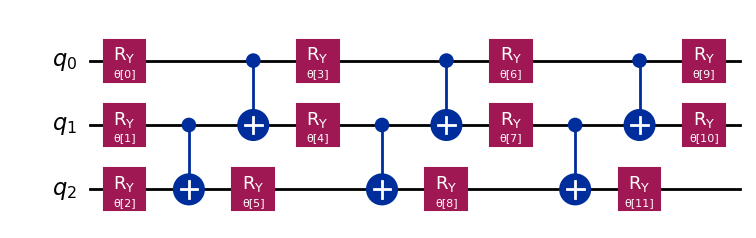

In [9]:
state.draw('mpl')

In [10]:
estimator = EstimatorV2()

est_job = estimator.run([(state, observables, params)])
est_result = est_job.result()[0].data.evs.item()

print(f'Exp. val. = {est_result}')

Exp. val. = 0.4763788362709295


In [11]:
for obs in observables:
    pauli_job = estimator.run([(state, obs, params)])
    pauli_result = pauli_job.result()[0].data.evs.item()
    print(f'<{obs.paulis[0]}> * {str(obs.coeffs.real)} = {pauli_result}')

<IZZ> * [1.] = 0.3703882734749126
<XZI> * [-1.7] = -0.2989214994556533
<IXX> * [1.02] = 0.5558194007571846
<YII> * [-0.3] = 0.0
<IIZ> * [0.5] = -0.15090733850551452
